# Grover’s algorithm for 4 qubits

C:\Users\jgcg3\AppData\Local\Temp\ipykernel_10920\1227021529.py:18: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circ.mcx([0, 1, 3], 2, mode='noancilla')  # mcx SIN ancilla
C:\Users\jgcg3\AppData\Local\Temp\ipykernel_10920\1227021529.py:32: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circ.mcx

Measurement result: ['0100']


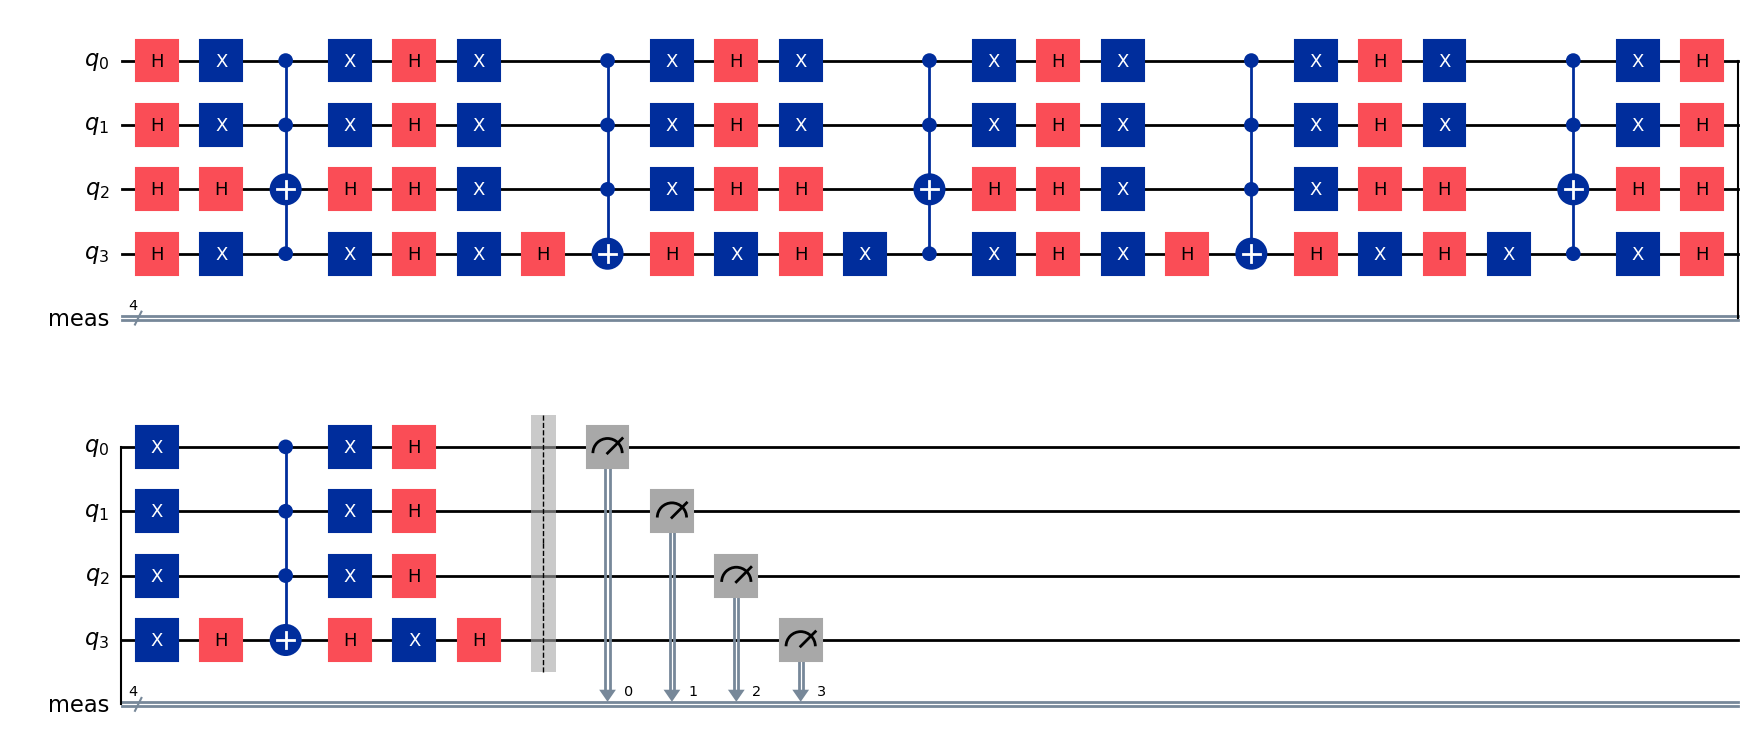

In [28]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler

# Create the circuit for 4 qubits
grover_circ = QuantumCircuit(4)

# Step 1: Initiatilizate into superposition
for q in range(4):
    grover_circ.h(q)

# Step 2: Define the oracle for the target state |0010> (which appears as '0100' in Qiskit)
def oracle(circ):
    circ.x(0)
    circ.x(1)
    circ.x(3)

    circ.h(2)
    circ.mcx([0, 1, 3], 2, mode='noancilla')  # mcx SIN ancilla
    circ.h(2)

    circ.x(0)
    circ.x(1)
    circ.x(3)

# Step 3: Define the Grover diffuser
def diffuser(circ):
    for q in range(4):
        circ.h(q)
        circ.x(q)

    circ.h(3)
    circ.mcx([0, 1, 2], 3, mode='noancilla')
    circ.h(3)

    for q in range(4):
        circ.x(q)
        circ.h(q)

# Step 4: Run 3 iterations of Grover (since π/4 * sqrt(2^4) = 3)
for _ in range(3):
    oracle(grover_circ)
    diffuser(grover_circ)

# Step 5: Measurement
grover_circ.measure_all()

# Step 6: Simulate with AerSimulator
sampler = StatevectorSampler()
job = sampler.run([grover_circ], shots=1)
result = job.result()[0]
state = result.data.meas.get_bitstrings()

# Step 7: Visualize results
print("Measurement result:", state)
grover_circ.draw("mpl")


C:\Users\jgcg3\AppData\Local\Temp\ipykernel_10920\8923409.py:24: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circ.mcx([0, 1, 3], 2, mode='noancilla')
C:\Users\jgcg3\AppData\Local\Temp\ipykernel_10920\8923409.py:39: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circ.mcx([0, 1, 2], 3, mode='noan

Measurement probabilities:
0010: 0.007
0011: 0.002
0100: 0.955
0101: 0.002
0110: 0.005
0111: 0.002
1000: 0.007
1001: 0.003
1010: 0.002
1011: 0.004
1100: 0.003
1101: 0.002
1110: 0.003
1111: 0.003


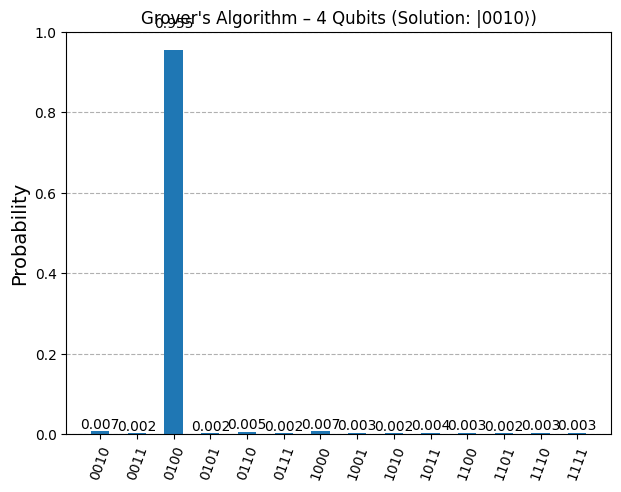

In [27]:
# %matplotlib inline  # Activa esto si estás en Jupyter

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 0: Create the circuit with 4 qubits
grover_circ = QuantumCircuit(4)

# Step 1: Initialize all qubits into superposition
for q in range(4):
    grover_circ.h(q)

# Step 2: Define the oracle for the target state |0010> (which appears as '0100' in Qiskit)
def oracle(circ):
    # Apply X to qubits that are 0 in the target state
    circ.x(0)
    circ.x(1)
    circ.x(3)

    # Apply multi-controlled Z (via H + MCX + H on target qubit)
    circ.h(2)
    circ.mcx([0, 1, 3], 2, mode='noancilla')
    circ.h(2)

    # Undo the X gates
    circ.x(0)
    circ.x(1)
    circ.x(3)

# Step 3: Define the Grover diffuser
def diffuser(circ):
    for q in range(4):
        circ.h(q)
        circ.x(q)

    circ.h(3)
    circ.mcx([0, 1, 2], 3, mode='noancilla')
    circ.h(3)

    for q in range(4):
        circ.x(q)
        circ.h(q)

# Step 4: Run 3 iterations of Grover (since √16 ≈ 4, so π/4 * 4 ≈ 3)
for _ in range(3):
    oracle(grover_circ)
    diffuser(grover_circ)

# Step 5: Measurement
grover_circ.measure_all()

# Step 6: Simulate with AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(grover_circ, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

# Step 7: Normalize counts to probabilities
total_shots = sum(counts.values())
probabilities = {k: v / total_shots for k, v in counts.items()}

# Print result
print("Measurement probabilities:")
for bitstring, prob in sorted(probabilities.items()):
    print(f"{bitstring}: {prob:.3f}")

# Step 8: Plot histogram with probabilities
plot_histogram(probabilities)
plt.title("Grover's Algorithm – 4 Qubits (Solution: |0010⟩)")
plt.ylabel("Probability")
plt.ylim(0, 1)  # force Y-axis from 0 to 1
plt.show()
